# Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set(style="ticks")

In [2]:
df = pd.read_csv('data/AppleStore.csv')
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


# Check Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
Unnamed: 0          7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 731.1+ KB


# Draw Graphs

## Const Vars

In [4]:
supSize = 30
titleSize = 20
labelSize = 15
tickSize = 12

## Matplotlib

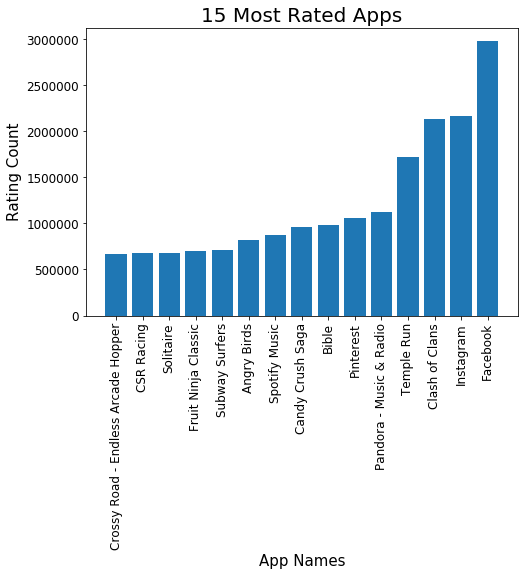

In [5]:
#TAR 4
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x = df.sort_values(['rating_count_tot'])[-15:]['track_name']
y = df.sort_values(['rating_count_tot'])[-15:]['rating_count_tot']

ax.bar(x, y)

ax.set_title('15 Most Rated Apps', fontsize=titleSize)
ax.set_xlabel('App Names', fontsize=labelSize)
ax.set_ylabel('Rating Count', fontsize=labelSize)
plt.xticks(rotation=90, fontsize=tickSize)
plt.yticks(fontsize=tickSize)

plt.show()

C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mthee\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12502 missing from c

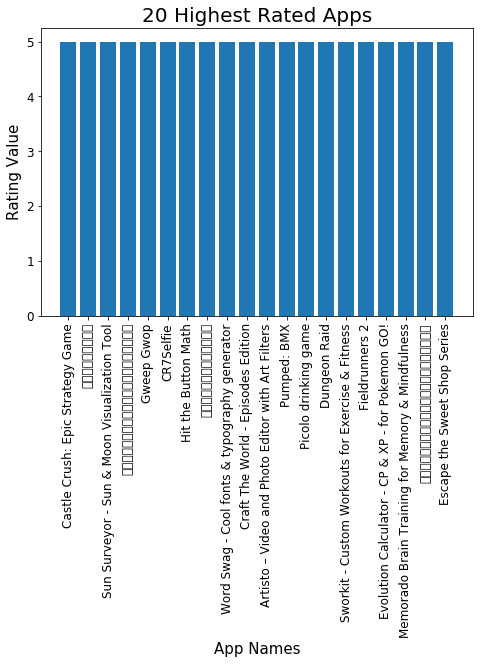

In [6]:
#TAR 5
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x = df.sort_values(['user_rating'])[-20:]['track_name']
y = df.sort_values(['user_rating'])[-20:]['user_rating']

ax.bar(x, y)

ax.set_title('20 Highest Rated Apps', fontsize=titleSize)
ax.set_xlabel('App Names', fontsize=labelSize)
ax.set_ylabel('Rating Value', fontsize=labelSize)
plt.xticks(rotation=90, fontsize=tickSize)
plt.yticks(fontsize=tickSize)

plt.show()

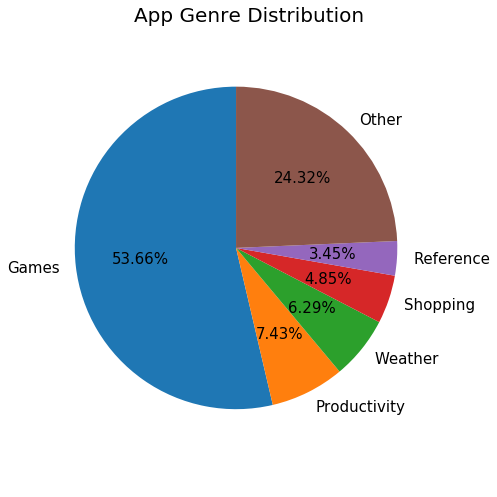

In [7]:
sliceIndex = 5
labels = df['prime_genre'].unique()[:sliceIndex]
labels = np.append(labels, ["Other"])
sizes = df['prime_genre'].value_counts()[:sliceIndex]
sizes = np.append(sizes, [len(df)-df['prime_genre'].value_counts()[:sliceIndex].sum()])

fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
ax.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, textprops={"fontsize": labelSize})
ax.axis('equal')
fig.suptitle('App Genre Distribution', fontsize=titleSize)

plt.show()

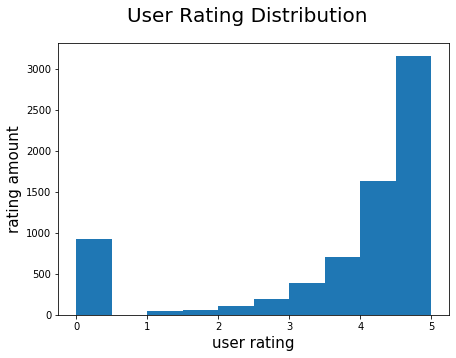

In [8]:
fig, axs = plt.subplots(figsize=(7, 5), tight_layout=False)
axs.hist(df["user_rating"])
fig.suptitle('User Rating Distribution', fontsize=titleSize)
plt.xlabel('user rating', fontsize=labelSize)
plt.ylabel('rating amount', fontsize=labelSize)
plt.show()

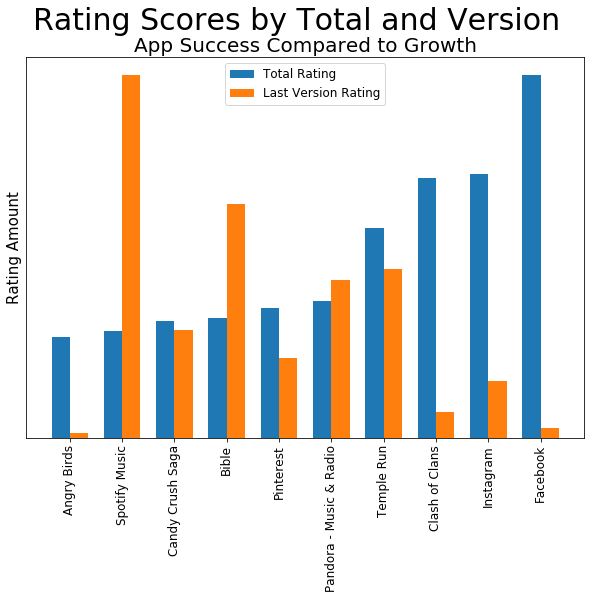

In [9]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
apps = 10
dff = df.sort_values(['rating_count_tot'])[-apps:][['track_name', 'rating_count_tot', 'rating_count_ver']].set_index('track_name')
labels = dff.index
tot_rating = dff['rating_count_tot']/dff['rating_count_tot'].max()
ver_rating = dff['rating_count_ver']/dff['rating_count_ver'].max()

mu = np.arange(apps)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7), tight_layout=False)
ax.bar(mu - width/2, tot_rating, width, label='Total Rating')
ax.bar(mu + width/2, ver_rating, width, label='Last Version Rating')

fig.suptitle ('Rating Scores by Total and Version', fontsize=supSize)
ax.set_title('App Success Compared to Growth', fontsize=titleSize)
ax.set_ylabel('Rating Amount', fontsize=labelSize)

ax.set_xticks(mu)
plt.xticks(rotation=90)
ax.set_xticklabels(labels, fontsize=tickSize)
ax.set_yticks([])
ax.legend(fontsize=tickSize)

plt.show()

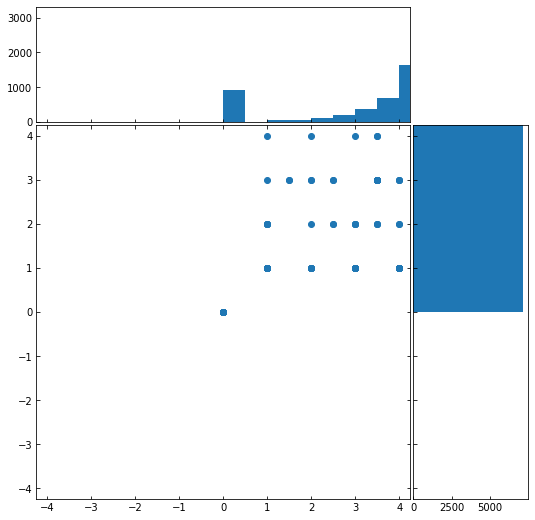

In [10]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(df['user_rating'], df['rating_count_tot'])

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

x = df['user_rating']
y = df['rating_count_tot']

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x)#, bins=bins)
ax_histy.hist(y, orientation='horizontal')#, bins=bins)#, )

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

## Seaborn

In [ ]:
#Tar 6
import seaborn as sns
dfTmp = df[df["prime_genre"] == "Games"].copy()
rule = ['Free' if x else 'Payed' for x in dfTmp['price'] == 0]
dfTmp['type'] = rule
sns.pairplot(dfTmp[['type', 'price', 'rating_count_tot', 'user_rating', 'sup_devices.num', 'lang.num']], hue="type")
plt.show()

C:\Users\mthee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mthee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
